Assignment 2 - BMI 505

Question 1

To which of these tasks would you apply a many-to-one RNN architecture?

a. Sentiment classification (input a piece of text and output a 0/1 to denote positive or negative sentiment).
        Option A DOES have a many to one relationship

b. Gender recognition from speech (input an audio clip and output a label indicating the speaker’s gender).
         Option B DOES have a many to one relationship

c. Translation of piece text from Chinese to English.
        Option C DOES NOT have a many to one relationship

d. Transforming an audio single to digital text.
      Option D DOES NOT have a many to one relationship

Question 2

Write a time series prediction model for stock prediction
    - see the RNNcode.ipynb Download RNNcode.ipynbfor initial inspiration. Coded in Keras. Feel free to use any other python library.

1 . Predicting the exact price at time  Ti
  given prices at times  Ti−60
 , ...,  Ti−1

In [27]:
from IPython.display import clear_output

!pip install yfinance

clear_output()

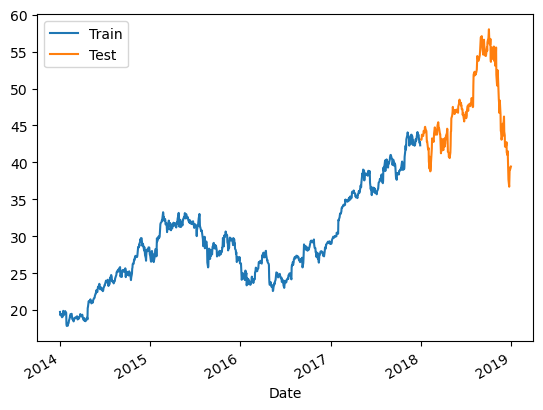

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296658,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916729,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008966,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887325,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994270,258529600
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.320255,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.271961,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.279049,85992800


In [28]:
import matplotlib.pyplot as plt
import yfinance as yf  
import pandas as pd

train_data = yf.download('AAPL','2014-01-01','2018-01-01')
test_data = yf.download('AAPL','2018-01-01','2019-01-01')

train_data.Close.plot()
test_data.Close.plot()
plt.legend (["Train", "Test"])

clear_output()
plt.show()
train_data

In [29]:
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
scaler = MinMaxScaler(feature_range = (0, 1)).fit(train_data.Close.values.reshape(-1, 1))

train_scaled = scaler.transform(train_data.Close.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

print ("train_scaled.shape :", train_scaled.shape)
print ("test_scaled.shape :", test_scaled.shape)

train_scaled.shape : (1007, 1)
test_scaled.shape : (251, 1)


In [30]:
train_features_set = []  
train_labels = [] 

for i in range(60, train_scaled.shape[0]):  
    train_features_set.append(train_scaled[i-60:i, 0])
    train_labels.append(train_scaled[i, 0])

In [31]:
train_features_set, train_labels = np.array(train_features_set), np.array(train_labels)
train_features_set = np.reshape(train_features_set, (train_features_set.shape[0], train_features_set.shape[1], 1))

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features_set.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer with dropout
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(train_features_set, train_labels, epochs=100, batch_size=30)

# Clear the output for better visualization
from IPython.display import clear_output
clear_output()

In [ ]:
test_features_set = []  
test_labels = [] 
for i in range(60, test_scaled.shape[0]):  
    test_features_set.append(test_scaled[i-60:i, 0])
    test_labels.append(test_scaled[i, 0])
    
test_features_set, test_labels = np.array(test_features_set), np.array(test_labels)
test_features_set = np.reshape(test_features_set, (test_features_set.shape[0], test_features_set.shape[1], 1))

6/6 [==============================] - 1s 10ms/step


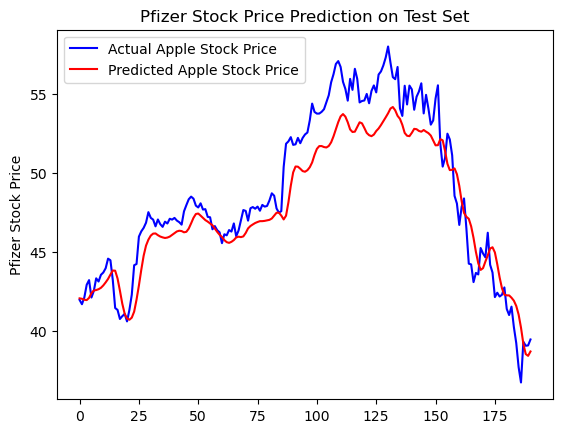

In [33]:
predictions = model.predict(test_features_set)
predictions = scaler.inverse_transform(predictions)  
  
plt.plot(test_data.Close.values[60:], color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Pfizer Stock Price Prediction on Test Set')    
plt.ylabel('Pfizer Stock Price')  
plt.legend()  
plt.show()

At first sight, it seems the predictions are following pretty well the actual trend. What do you think about the result? Are you willing to risk using this predictions in real world?

The predicted stock price closely aligns with the actual stock price. I would trust the model to a certain degree, I might predict that the actual stock is higher than the predicted at some time intervals. Overall, the model is good at predicting the stock price. That being said, many external factors influence the stock market that our model doesn't account for. In the case that a pandemic happens, etc, then our model would be less reliable. 

2 . A simplified version of previous problem, predicting the direction of price at time  Ti
  (whether it is increasing or decreasing) given prices at times  Ti−60
 , ...,  Ti−1

In [42]:
train_binary_labels = []

# If current value is greater than last value, Ti - 1, then make it a 1 otherwise make it a 0
for i in range(1, len(train_labels)):
    if train_labels[i] > train_labels[i-1]:
        train_binary_labels.append(1)
    else:
        train_binary_labels.append(0)

# Since the first value doesn't have a value to compare it to, set it to 0.
train_binary_labels = [0] + train_binary_labels
train_binary_labels = np.array(train_binary_labels)

print("Original Feature Values (first ten):", train_labels[:10])
print("Binary Features (first ten):", train_binary_labels[:10])

Original Feature Values (first ten): [0.05027483 0.0569536  0.05817782 0.05306331 0.04358233 0.03222427
 0.03218352 0.04154202 0.03223793 0.02697377]
Binary Features (first ten): [0 1 1 0 0 0 0 1 0 0]


In [35]:
# Reshape the data
samples, timesteps, features = train_features_set.shape
train_features_set_reshaped = train_features_set.reshape(samples * timesteps, features)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_features_set_scaled = scaler.fit_transform(train_features_set_reshaped)

# Reshape back to 3D
train_features_set_scaled = train_features_set_scaled.reshape(samples, timesteps, features)

# Define the model
model = Sequential()

# LSTM layers with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(train_features_set_scaled, train_binary_labels, epochs=20, batch_size=32)

Epoch 1/20
30/30 [==============================] - 3s 35ms/step - loss: 0.6944 - accuracy: 0.5164
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6929 - accuracy: 0.5143
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6934 - accuracy: 0.5216
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6925 - accuracy: 0.5216
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.5227
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6933 - accuracy: 0.5216
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6925 - accuracy: 0.5216
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 9/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6922 - accuracy: 0.5195
Epoch 10/20
30/30 [==============================] - 40s 1s/step - loss: 0.6924 - accuracy: 0.5227
Epoch 11/2

Evaluate your trained model using the test set and report accuracy and f1-score your model archived:

In [43]:
test_binary_labels = []

# If current value is greater than last value, then make it a 1 otherwise make it a 0
for i in range(1, len(test_labels)):
    if test_labels[i] > test_labels[i-1]:
        test_binary_labels.append(1)
    else:
        test_binary_labels.append(0)

# Since the first value doesn't have a value to compare it to, set it to 0.
test_binary_labels = [0] + test_binary_labels
test_binary_labels = np.array(test_binary_labels)

print("Original Feature Values (first ten):", test_labels[:10])
print("Binary Features (first ten(:",test_binary_labels[:10])

Original Feature Values (first ten): [0.9177322  0.90725823 0.92354047 0.95420047 0.96553136 0.9234453
 0.93934658 0.96981611 0.96210353 0.97829045]
Binary Features (first ten(: [0 0 1 1 1 0 1 1 0 1]


In [40]:
from sklearn.metrics import f1_score

# Reshape the testing data
samples_test, timesteps_test, features_test = test_features_set.shape
test_features_set_reshaped = test_features_set.reshape(samples_test * timesteps_test, features_test)

# Scale the testing data using the same scaler used for training data
test_features_set_scaled = scaler.transform(test_features_set_reshaped)

# Reshape back to 3D 
test_features_set_scaled = test_features_set_scaled.reshape(samples_test, timesteps_test, features_test)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_features_set_scaled, test_binary_labels)

# Make predictions on the testing data
predictions = model.predict(test_features_set_scaled)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Compute the F1 score
f1 = f1_score(test_binary_labels, binary_predictions)
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)
print("F1 Score:", f1)

6/6 [==============================] - 0s 10ms/step
Testing Loss: 0.6926344037055969
Testing Accuracy: 0.5078533887863159
F1 Score: 0.626984126984127


Do not worry if your results are not as promising as before :))

Comparing new results with previuos ones, why do you think this happens? Doesn't this task supposed to be an easier version of the previous one (if you are able to predict the actual price, you are already able to predict the direction of price trend)? Explain your thoughts: 

The complexity of the underlying relationships within the data might not be adequately captured by the classification model. Regression models, especially those with sophisticated architectures like neural networks, might have better capacity to capture complex patterns and relationships whereas classification models don't. By simplifying the prediction to a binary outcome, classification models inherently lose some information present in the continuous target variable.